In [1]:
import numpy as np
from math import * 
from scipy.optimize import minimize, fmin_bfgs
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Exercise 1

* (a) Define objective function

In [2]:
def objective1(p):
    result=0
    a=[100,150,300]
    d=[]        
    for i in range(3): 
        di=a[i]*exp(-p[i]/a[i])
        d.append(di)
        result=result+d[i]*p[i]
    return -result

* Define 4 constraints

In [3]:
#D1>=0
def cons1(p):
    result=100*exp(-p[0]/100)
    return result
#D2>=0
def cons2(p):
    result=150*exp(-p[1]/150)
    return result
#D3>=0
def cons3(p):
    result=300*exp(-p[2]/300)
    return result
#the same as constaints above
#(D1+D2+D3)<=150  --> change to 150-(D1+D2+D3))>=0
def cons4(p):
    result=cons1(p)+cons2(p)+cons3(p)
    return 150-result

* Try random function

In [4]:
print(random.random())
print(random.randint(1,10))
print(random.randrange(100))

0.18492669346961343
4
78


* Given a random initial point p0

In [5]:
#no bounds for pricing (p)
#p0=np.zeros(3)
p0=[random.randrange(100),random.randrange(100),random.randrange(100)]
print(objective1(p0))

-28495.32280060122


* Apply Scipy minimization

In [6]:
con1={'type': 'ineq', 'fun':cons1}
con2={'type': 'ineq', 'fun':cons2}
con3={'type': 'ineq', 'fun':cons3}
con4={'type': 'ineq', 'fun':cons4}
cons=[con1,con2,con3,con4]

sol=minimize(objective1,p0,method='SLSQP',constraints=cons)

* (b)Optimal result

In [7]:
print('\nExpective revenue:' , -round(sol.fun))
print('Seat[D1,D2,D3]: ', round(cons1(sol.x)),',',round(cons2(sol.x)),',',round(cons3(sol.x)))
print('Price[P1,P2,P3]: ', round(sol.x[0],2),',',round(sol.x[1],2),',',round(sol.x[2],2))


Expective revenue: 43671
Seat[D1,D2,D3]:  21 , 38 , 91
Price[P1,P2,P3]:  156.75 , 206.75 , 356.75


* (c) create a sensitive result function

In [8]:
def sensiAna(increase):
    def new_cons4(p):
        return cons4(p)+increase
    con1={'type': 'ineq', 'fun':cons1}
    con2={'type': 'ineq', 'fun':cons2}
    con3={'type': 'ineq', 'fun':cons3}
    con4={'type': 'ineq', 'fun':new_cons4}
    new_cons=[con1,con2,con3,con4]
    newsol=minimize(objective1,p0,method='SLSQP',constraints=new_cons)
    return newsol

* Result from sensitivity function 

So the revenue increase: 164 if we increase the seat by 3

In [9]:
newsol=sensiAna(3)
print('\nwhen we increase the seat by 3\n')
print('New Expective revenue:' , -round(newsol.fun))
print('New seat[D1,D2,D3]: ', round(cons1(newsol.x)),', ',round(cons2(newsol.x)),',',round(cons3(newsol.x)))
print('New price[P1,P2,P3]: ', round(newsol.x[0],2),', ',round(newsol.x[1],2),',',round(newsol.x[2],2))


when we increase the seat by 3

New Expective revenue: 43835
New seat[D1,D2,D3]:  22 ,  39 , 93
New price[P1,P2,P3]:  152.87 ,  202.87 , 352.87


# Exercise 2: 
with gradient based optimization

### we run 2-1 and 2-2 with 10 random starting points with plot

we see that Rosenvrock function always converage close to 0 global minimum. However, eggcrate function does not always converage to 0, that is sometimes it stuck at local minimum


### 2-1: Banana (Rosenvrock) function

with fix starting point (0,0), we get result close to 
(x1: 1 , x2: 1), (result: 0.0)

In [19]:
def ex21objective(x):
    x1=x[0]
    x2=x[1]
    return 100*(x2-x1**2)**2+(1-x1)**2
#define bound 
b=(-5,5)
bnds=(b,b)

#starting point
x0=np.zeros(2)

#apply Scipy
ex21sol=minimize(ex21objective,x0,method='L-BFGS-B',bounds=bnds)
print('x1: ',ex21sol.x[0],' x2: ' ,ex21sol.x[1])
print('result:',ex21objective(ex21sol.x))

print(ex21sol)

x1:  0.9999972819270788  x2:  0.9999945459193654
result: 7.42011258744592e-12
      fun: 7.42011258744592e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.75068512e-06, -2.58843602e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 84
      nit: 21
   status: 0
  success: True
        x: array([0.99999728, 0.99999455])


1 1.3153131957854345 2.8687573069231522 129.76512810046594
2 1.5921382139383264 2.456632335588928 0.9632744539993519
3 1.5695299021509082 2.463567551904276 0.32436636689455256
4 1.5689883462375764 2.4635527413789764 0.3240820101739013
5 1.438036263040097 2.052415218779335 0.21600340975482837
6 1.3518082783968877 1.8063783706284529 0.16789952384455634
7 1.3032398395353042 1.701205363482886 0.09272240185480414
8 1.166329651516547 1.350581089656489 0.03715965124238657
9 1.1297503854833262 1.2808554814148119 0.018877793868749083
10 1.09072332622738 1.1871506931050684 0.008869133746510015
11 1.0533812297057412 1.1042318669724946 0.005744155068391304
12 1.0305020365690307 1.061561094047871 0.0009443135053909984
13 1.0027191924787893 1.0055535135361953 8.554681512973472e-06
14 1.002756859517167 1.0055320235608596 7.611732498756617e-06
15 0.9999609741558217 0.9999169545281186 4.018325258091653e-09
16 0.999959052639585 0.9999179512996187 1.6791092113888762e-09
17 -1.2337179918048102 -3.79867007

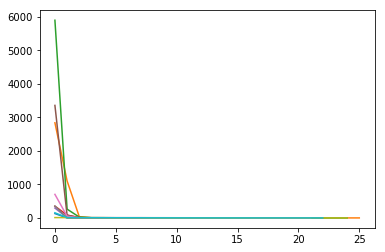

In [22]:
#define callback function
Nfeval1 = 1
def callbackF1(Xi) :
    global resultlist1
    global Nfeval1
    print(Nfeval1, Xi[0],Xi[1],ex21objective(Xi))
    resultlist1.append(ex21objective(Xi))
    Nfeval1 += 1
    
#x0=[random.uniform(-5,5),random.uniform(-5,5)]  
#ex21sol=minimize(ex21objective,x0,method='TNC',bounds=bnds, callback=callbackF1)

#Banana (Rosenvrock) function
def ex21objective(x):
    x1=x[0]
    x2=x[1]
    return 100*(x2-x1**2)**2+(1-x1)**2
#define bound 
b=(-5,5)
bnds=(b,b)
result1=[]
for i in range(10):
    
    start_time = time.time()
    resultlist1=[]
    x0=[random.uniform(-5,5),random.uniform(-5,5)]
    ex21sol=minimize(ex21objective,x0,method='TNC',bounds=bnds, callback=callbackF1)
    end_time = time.time()
    a=(i+1,ex21sol.nit,ex21sol.x[0],ex21sol.x[1],ex21objective(ex21sol.x),end_time-start_time)
    result1.append(a)
    
    nbiter1=[]
    for f in range(0,ex21sol.nit):
        nbiter1.append(f)
    plt.plot(nbiter1,resultlist1)
    
dfresult=pd.DataFrame(result1,columns=['Run','nbiter','x1','x2','f(x)','CPU(time)'])
print(dfresult)

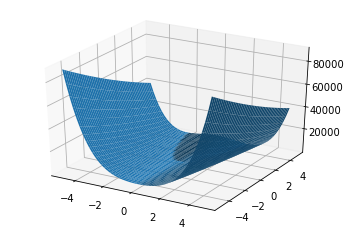

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
xmesh, ymesh = np.mgrid[-5:5:50j,-5:5:50j]
fmesh = ex21objective(np.array([xmesh, ymesh]))

surf=ax.plot_surface(xmesh,ymesh,fmesh)


### 2-2: Eggcrate function

With fix starting point at (0,0)
(x1: 0.0, x2: 0.0), (result: 0.0)

In [13]:
#exercise 2-2:
#Eggcrate function
def ex22objective(x):
    x1=x[0]
    x2=x[1]
    result= x1**2+x2**2+25*((sin(x1))**2+(sin(x2))**2)
    return result
#define bound 
b=(-2*pi,2*pi)
bnds=(b,b)

#starting point
x0=np.zeros(2)

#apply Scipy
ex22sol=minimize(ex22objective,x0,method='TNC',bounds=bnds)
print('x1: ',ex22sol.x[0],' x2: ' ,ex22sol.x[1])
print('result:',ex22objective(ex22sol.x))

x1:  0.0  x2:  0.0
result: 0.0


1 2.971563858233563 4.847552988644399 57.59081041622369
2 2.9167845531827177 -3.016250760907013 19.238438289216283
3 2.9233322740780405 -3.0436249708498724 19.220847946624037
4 3.0087455902710887 -3.024449518520327 18.979960531982496
5 3.0198321968324646 -3.0194801033817984 18.97639639273308
6 3.0196024561111177 -3.0196015707304857 18.976394678223254
7 3.019601866741792 -3.019601898157889 18.976394678212532
   Run  nbiter        x1        x2       f(x)  CPU(time)
0    1       7  3.019602 -3.019602  18.976395   0.003987
8 -2.8288227244501374 -3.29568771967771 21.819654834620966
9 -2.741324659581447 -3.056342494619139 20.833313913459296
10 -2.9693378919552016 -3.1746243703895187 19.656959635704656
11 -3.0112268871775068 -2.975912029427866 19.0260145124466
12 -3.0064898396637734 -3.0113840169153505 18.98243173182563
13 -3.019118272936168 -3.019308610720989 18.976402757949813
14 -3.0196315140957224 -3.019619867950194 18.976394708556757
15 -3.019601897866237 -3.0196018615921667 18.976394678

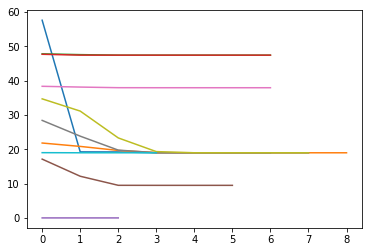

In [14]:
#define callback function
Nfeval2 = 1
def callbackF2(Xi) :
    global resultlist2
    global Nfeval2
    print(Nfeval2, Xi[0],Xi[1],ex22objective(Xi))
    resultlist2.append(ex22objective(Xi))
    Nfeval2 += 1
    
#x0=[random.uniform(-2*pi,2*pi),random.uniform(-2*pi,2*pi)]
#ex22sol=minimize(ex22objective,x0,method='TNC',bounds=bnds, callback=callbackF2)

#Eggcrate function
def ex22objective(x):
    x1=x[0]
    x2=x[1]
    result= x1**2+x2**2+25*(sin(x1)**2+sin(x2)**2)
    return result
#define bound 
b=(-2*pi,2*pi)
bnds=(b,b)
result2=[]
#with random starting point
for i in range(10):
    
    start_time = time.time()
    resultlist2=[]
    x0=[random.uniform(-2*pi,2*pi),random.uniform(-2*pi,2*pi)]
    ex22sol=minimize(ex22objective,x0,method='TNC',bounds=bnds, callback=callbackF2)
    end_time = time.time()
    a=(i+1,ex22sol.nit,ex22sol.x[0],ex22sol.x[1],ex22objective(ex22sol.x),end_time-start_time)
    result2.append(a)
    
    nbiter2=[]
    
    for f in range(0,ex22sol.nit):
        nbiter2.append(f)
    plt.plot(nbiter2,resultlist2)
    

    print(pd.DataFrame(result2,columns=['Run','nbiter','x1','x2','f(x)','CPU(time)']))

##we can test to see how many run would stuck at the local minimum
##by changing the range to 100 and run below command

#dfre=pd.DataFrame(result2,columns=['Run','nbiter','x1','x2','f','CPU(time)'])
#dfre[dfre.f<0.1].count()

### 2-3 Speed Reducer

Even though the success of the minimization is always False (means not reaching the global minimum) but all the tried (10 times) always reach to around 2995 that is to said, we can say this as a result. (converge close to the global minimum)

In [15]:
#exercise 2-3 Speed Reducer 
#Golinski

def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    x5=x[4]
    x6=x[5]
    x7=x[6]
    a=(0.7858*3.3333)*x1*(x2**2)*(x3**2)
    b=(0.7854*14.9334)*x1*(x2**2)*x3
    c=(0.7854*43.0934)*x1*(x2**2)
    d=1.508*(x1*(x6**2)+x1*(x7**2))
    e=7.4777*(x6**3+x7**3)
    f=0.7854*((x4*(x6**2))+(x5*(x7**2)))
    result=a+b-c-d+e+f
    return result

In [16]:
#Constraints (change to >=0)
def cons1(x):
    result=(27/(x[0]*(x[1]**2)*x[2]))-1
    return -result
def cons2(x):
    result=(397.5/(x[0]*(x[1]**2)*(x[2]**2)))-1
    return -result
def cons3(x):
    result=((1.93*x[3]**3)/(x[1]*x[2]*(x[5]**4)))-1
    return -result
def cons4(x):
    result=((1.93*x[4]**3)/(x[1]*x[2]*(x[6]**4)))-1
    return -result
def cons5(x):
    result=(745**2)*(x[3]**2)/((x[1]**2)*(x[2]**2))-(110**2)*(x[5]**6)+16.9*(10**6)
    return -result
def cons6(x):
    result=(745**2)*(x[4]**2)/((x[1]**2)*(x[2]**2))-(85**2)*(x[6]**6)+157.5*(10**6)
    return -result
def cons7(x):
    result = (x[1]*x[2])-40
    return -result
def cons8(x):
    result = 5*x[1]-x[0]
    return -result
def cons9(x):
    result = x[0]-12*x[1]
    return -result
def cons10(x):
    result = 1.5*x[5]-x[3]+1.9
    return -result
def cons11(x):
    result = 1.1*x[6]-x[4]+1.9
    return -result

con1={'type': 'ineq', 'fun':cons1}
con2={'type': 'ineq', 'fun':cons2}
con3={'type': 'ineq', 'fun':cons3}
con4={'type': 'ineq', 'fun':cons4}
con5={'type': 'ineq', 'fun':cons5}
con6={'type': 'ineq', 'fun':cons6}
con7={'type': 'ineq', 'fun':cons7}
con8={'type': 'ineq', 'fun':cons8}
con9={'type': 'ineq', 'fun':cons9}
con10={'type': 'ineq', 'fun':cons10}
con11={'type': 'ineq', 'fun':cons11}

cons=[con1,con2,con3,con4,con5,con6,con7,con8,con9,con10,con11]
 
b1=(2.6, 3.6)
b2=(0.7, 0.8)
b3=(17, 28)
b4=(7.3, 8.3)
b5=(7.3, 8.3)
b6=(2.9, 3.9)
b7=(5, 5.9)
bnds=(b1,b2,b3,b4,b5,b6,b7)

In [17]:
#define callback function 3
Nfeval3 = 1
def callbackF3(Xi) :
    global resultlist3
    global Nfeval3
    print(Nfeval3, Xi[0],Xi[1],Xi[2],Xi[3],Xi[4],Xi[5],Xi[6],objective(Xi))
    resultlist3.append(objective(Xi))
    Nfeval3 += 1

1 3.5000036553403167 0.7000339802668332 17.000001370418772 7.3000000729078405 7.853477650801802 3.4524037102501293 5.412257702463761 3106.991427027099
2 3.5013754340505354 0.7 17.0 7.3 7.723861782496734 3.3562398664590445 5.291904485522462 3000.736598430432
3 3.5000015732130603 0.7000181520681508 17.00000069409319 7.300000035512768 7.715334307580755 3.3502426695155476 5.286670027364192 2995.2320379771327
4 3.4999998669013364 0.7 17.0 7.300000004973774 7.715319717527754 3.3502141972013026 5.286653828342935 2995.1313257779266
5 3.499995504736077 0.7 17.00000014580793 7.30000003819 7.715287206994427 3.3501817025209837 5.286627267442899 2995.10377015941
6 3.4701682078590848 0.7002266827390806 17.0 7.301569362088253 7.5039116794949 3.1385438283063194 5.114627210030266 2823.5423714489725
7 3.499969824887166 0.7000002282486502 17.000000000143054 7.300001585204505 7.715106817198886 3.3500010327449594 5.286480587315587 2994.9515275414597
8 3.4999854139559927 0.7 17.0 7.3 7.724536373871793 3.353

69 3.4999990540931227 0.7 17.0 7.3 7.727127248825228 3.4979414450308184 5.297387605181091 3041.544422951974
70 3.499998796773368 0.7 17.0 7.3 7.715379504985426 3.3649600656636096 5.286706743787083 2998.940121942244
71 3.499999333572677 0.7 17.0 7.300000031894236 7.715319845882564 3.3503726628699284 5.286653259613987 2995.1711431336594
72 3.499995673274376 0.7 17.0 7.300000883260273 7.715319464789331 3.3501493988359736 5.286645840724505 2995.108093132326
73 3.499995673274376 0.7 17.0 7.300000883260273 7.715319464789331 3.3501493988359736 5.286645840724505 2995.108093132326
   Run  nbiter        x1        x2         x3        x4        x5        x6  \
0    1      11  3.499970  0.700000  17.000000  7.300002  7.715107  3.350001   
1    2      10  3.499998  0.700000  17.000000  7.300000  7.715320  3.350213   
2    3      14  3.500000  0.700000  17.000000  7.300000  7.715320  3.350214   
3    4      13  3.499999  0.700000  17.000000  7.300000  7.715320  3.350214   
4    5      11  3.500000  

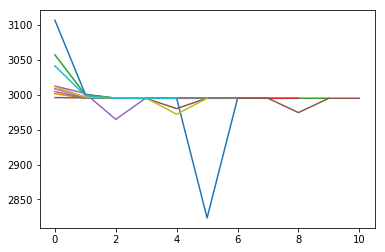

In [18]:
result=[]
for i in range(10):
    start_time=time.time()
    resultlist3=list()
    x0=[random.uniform(2.6, 3.6),random.uniform(0.7, 0.8),random.uniform(17, 28),
        random.uniform(7.3, 8.3),random.uniform(7.3, 8.3),random.uniform(2.9, 3.9),random.uniform(5, 5.9)]
    sol3= minimize(objective,x0, method='SLSQP', constraints = cons, bounds = bnds, callback=callbackF3)
    end_time=time.time()
    a=(i+1,sol3.nit,sol3.x[0],sol3.x[1],sol3.x[2],sol3.x[3],sol3.x[4],sol3.x[5],sol3.x[6],sol3.fun,end_time-start_time)
    result.append(a)
    nbiter3=list()  
    for f in range(0,sol3.nit-4):
        nbiter3.append(f)

    plt.plot(nbiter3,resultlist3)

print(pd.DataFrame(result,columns=['Run','nbiter','x1','x2','x3','x4','x5','x6','x7','f(x)','CPU(time)']))
